In [1]:
import requests
import pandas as pd
import math
import numpy as np
import requests
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
from ftplib import FTP
import os
import rioxarray
import xarray as xr
import math

In [2]:
%pip install pyunpack patool
from pyunpack import Archive

Note: you may need to restart the kernel to use updated packages.


In [3]:
reload = False
if reload:
    with FTP('ftp3.ign.fr', 'RGE_ALTI_ext', 'Thae5eerohsei8ve') as ftp:
        with open('data-tmp/RGEALTI_2-0_5M_ASC_WGS84UTM20-MART87_D972_2015-10-21.7z', 'wb') as fp:
            ftp.retrbinary('RETR RGEALTI_2-0_5M_ASC_WGS84UTM20-MART87_D972_2015-10-21.7z', fp.write)

    os.makedirs(path_5m, exist_ok=True)
    Archive('data-tmp/RGEALTI_2-0_5M_ASC_WGS84UTM20-MART87_D972_2015-10-21.7z').extractall("data-tmp/")

In [4]:
path = "data-tmp/RGEALTI_2-0_5M_ASC_WGS84UTM20-MART87_D972_2015-10-21/RGEALTI/3_SUPPLEMENTS_LIVRAISON_2020-06-00373/RGEALTI_MNT_5M_ASC_WGS84UTM20_MART87_D972/dalles.shp"
gdf = gpd.read_file(path)
gdf

,NOM_DALLE,SRC,SRV,DATE_DEBUT,DATE_FIN,PARTENAIRE,LITTO3D,PAS,CAPTEUR,Z_MIN,Z_MAX,NB_CORREL,NB_LIDAR_T,NB_LIDAR_B,NB_SMF,NB_RADAR,NB_NODATA,CGU,geometry
0,RGEALTI_MTQ_0720_1625_MNT_WGS84UTM20_MART87,WGS84UTM20,MART87,2010-02-01,2010-03-05,NC,Oui,5,ALTM31000AE-IGN,-16.2,313.1,0,639933,226957,0,0,133110,Licence IGN,"POLYGON ((720000.000 1620000.000, 720000.000 1..."
1,RGEALTI_MTQ_0710_1610_MNT_WGS84UTM20_MART87,WGS84UTM20,MART87,2010-02-01,2010-03-05,NC,Oui,5,ALTM31000AE-IGN,-21.4,349.4,0,733255,141199,0,0,125546,Licence IGN,"POLYGON ((710000.000 1605000.000, 710000.000 1..."
2,RGEALTI_MTQ_0730_1625_MNT_WGS84UTM20_MART87,WGS84UTM20,MART87,2010-02-01,2010-03-05,NC,Oui,5,ALTM31000AE-IGN,-26.6,3.1,0,457,39543,0,0,960000,Licence IGN,"POLYGON ((730000.000 1620000.000, 730000.000 1..."
3,RGEALTI_MTQ_0700_1610_MNT_WGS84UTM20_MART87,WGS84UTM20,MART87,2010-02-01,2010-03-05,NC,Oui,5,ALTM31000AE-IGN,-46.5,77.7,0,1092,19278,0,0,979630,Licence IGN,"POLYGON ((700000.000 1605000.000, 700000.000 1..."
4,RGEALTI_MTQ_0700_1625_MNT_WGS84UTM20_MART87,WGS84UTM20,MART87,2010-02-01,2010-03-05,NC,Oui,5,ALTM31000AE-IGN,7.3,917.6,0,1000000,0,0,0,0,Licence IGN,"POLYGON ((700000.000 1620000.000, 700000.000 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,RGEALTI_MTQ_0715_1635_MNT_WGS84UTM20_MART87,WGS84UTM20,MART87,2010-02-01,2010-03-05,NC,Oui,5,ALTM31000AE-IGN,-34.5,290.7,0,699556,180278,0,0,120166,Licence IGN,"POLYGON ((715000.000 1630000.000, 715000.000 1..."
70,RGEALTI_MTQ_0705_1640_MNT_WGS84UTM20_MART87,WGS84UTM20,MART87,2010-02-01,2010-03-05,NC,Oui,5,ALTM31000AE-IGN,22.4,701.6,0,1000000,0,0,0,0,Licence IGN,"POLYGON ((705000.000 1635000.000, 705000.000 1..."
71,RGEALTI_MTQ_0735_1600_MNT_WGS84UTM20_MART87,WGS84UTM20,MART87,2010-02-01,2010-03-05,NC,Oui,5,ALTM31000AE-IGN,-36.1,23.1,0,11807,148018,0,0,840175,Licence IGN,"POLYGON ((735000.000 1595000.000, 735000.000 1..."
72,RGEALTI_MTQ_0715_1640_MNT_WGS84UTM20_MART87,WGS84UTM20,MART87,2010-02-01,2010-03-05,NC,Oui,5,ALTM31000AE-IGN,-40.5,68.2,0,52498,140482,0,0,807020,Licence IGN,"POLYGON ((715000.000 1635000.000, 715000.000 1..."


In [5]:
data = []
path = "data-tmp/RGEALTI_2-0_5M_ASC_WGS84UTM20-MART87_D972_2015-10-21/RGEALTI/1_DONNEES_LIVRAISON_2020-06-00373/RGEALTI_MNT_5M_ASC_WGS84UTM20_MART87_D972"
for i in range(74):
    data.append(rioxarray.open_rasterio(os.path.join(path, gdf.iloc[i].NOM_DALLE + '.asc')))
dds = xr.combine_by_coords(data)

(689997.5, 739997.5, 1590002.5, 1650002.5)

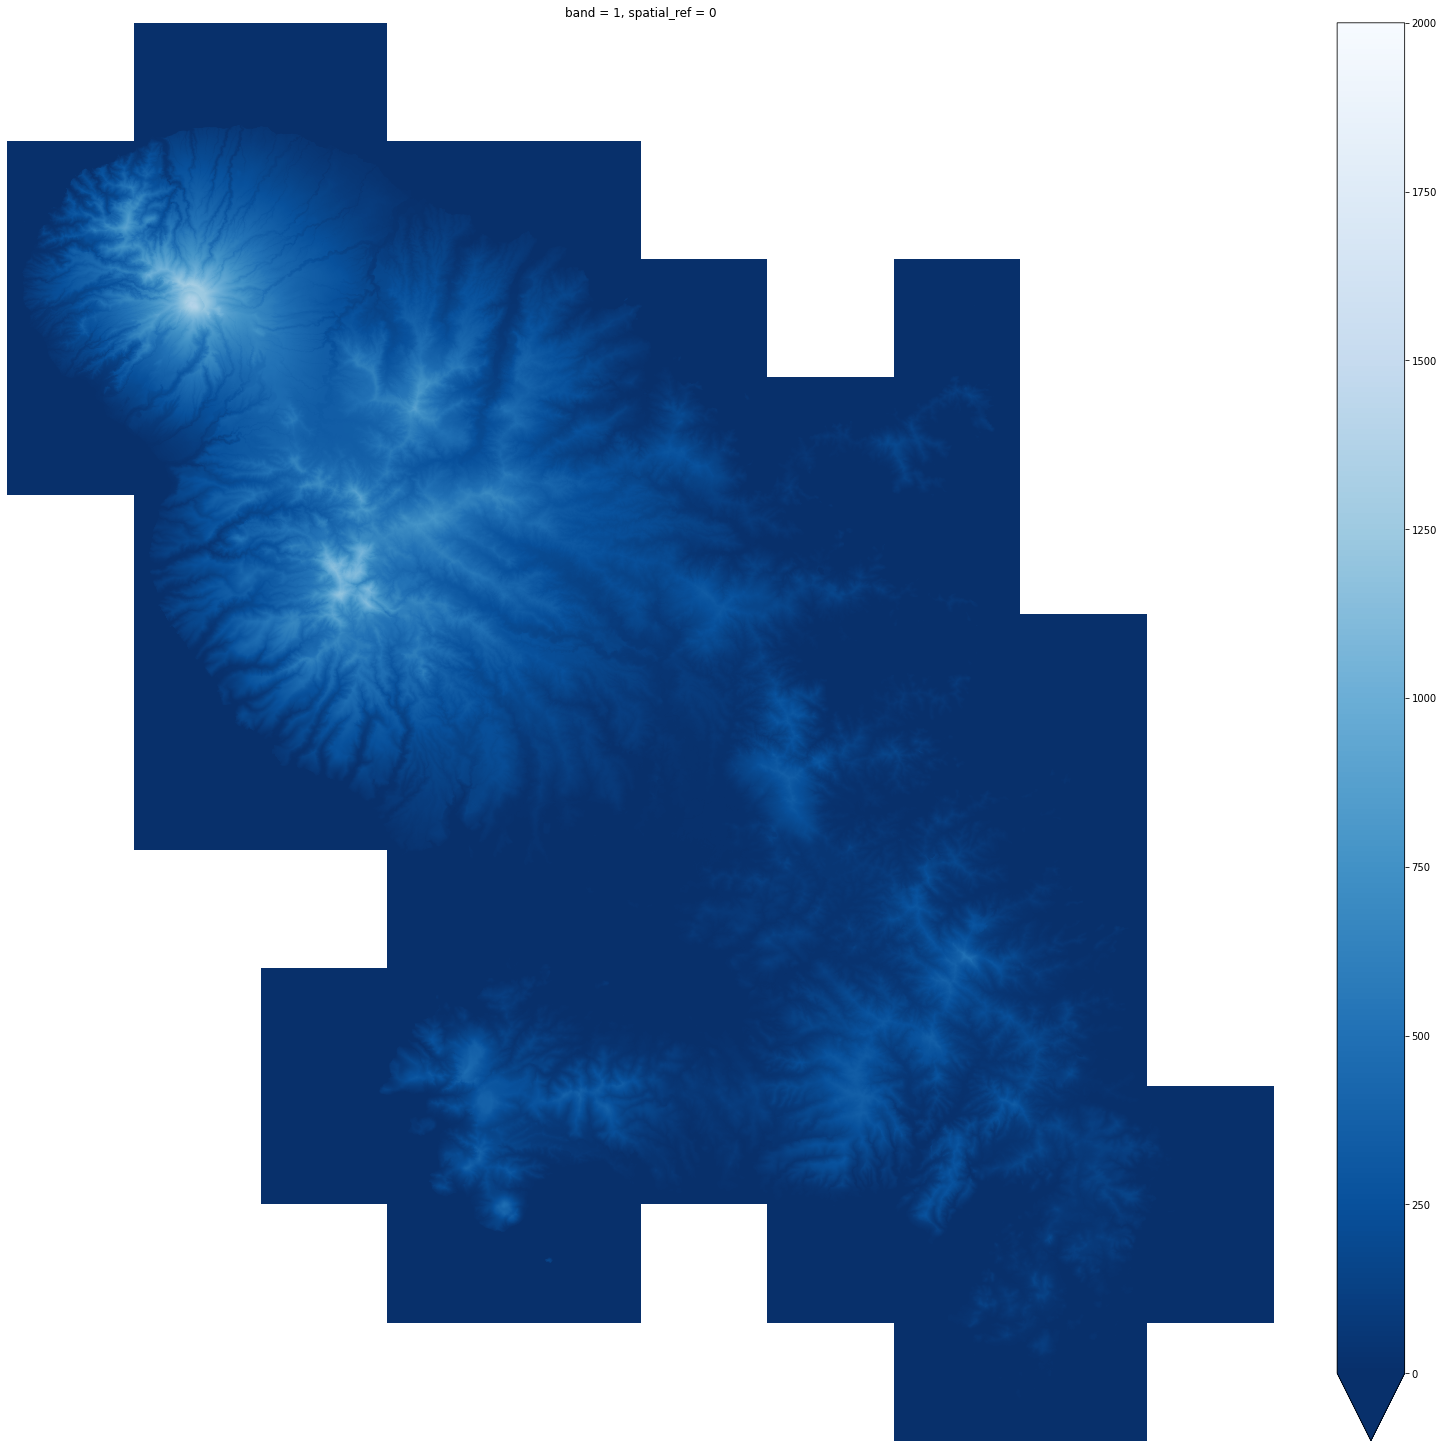

In [6]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(20, 20))
dds.plot(ax=ax, cmap = "Blues_r", vmin = 0, vmax = 2000)
ax.axis('off')
# plt.savefig(f'output/2022-11-18.png', facecolor='#08306b')